In [ ]:
#imports
!pip install plotly
from google.colab import drive
import pandas as pd
import ipywidgets as widgets
import plotly.express as px
import collections
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import plotly.graph_objects as go
!pip install rowordnet
import rowordnet as rwn
import plotly.figure_factory as ff



drive.mount('/content/drive')

file_name='drive/MyDrive/tema2IA/dataset.pickle'
xls = pd.ExcelFile('drive/MyDrive/tema2IA/studenti.xlsx')
df = pd.read_pickle(file_name)

     |████████████████████████████████| 11.8 MB 19.6 MB/s 
Mounted at /content/drive


In [ ]:
#build dictionaries for number of sentences and synsets per literal
literal_sentences={}
literal_synsets={}
for literals in df:
  sentences=[]
  count_sentences = 0
  for inputs in df[literals]:
    if inputs['sentence'] not  in sentences:
      count_sentences=count_sentences+1;
      sentences.append(inputs['sentence'])
  literal_sentences[literals]=count_sentences
  literal_synsets[literals]=len(df[literals][0]['synsets'].split())-1


#begin A

Numarul mediu de propozitii per literal
34.442151947551096


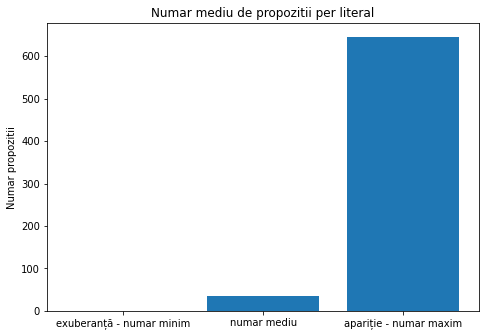

In [ ]:
#a
#calculeaza minim, maxim si numar mediu de propozitii
minim_prop=999
maxim_prop=0
literal_min=[]
literal_max=[]
sum=0
for i in literal_sentences:
  sum=sum+literal_sentences[i]
  if(literal_sentences[i]<minim_prop):
    minim_prop=literal_sentences[i]
  if(literal_sentences[i]>maxim_prop):
    maxim_prop=literal_sentences[i]

for i in literal_sentences:
  if(literal_sentences[i]==minim_prop):
    literal_min.append(i)
  if(literal_sentences[i]==maxim_prop):
    literal_max.append(i)
nr_mediu_prop_per_literal=sum/len(literal_sentences)
print("Numarul mediu de propozitii per literal")
print(nr_mediu_prop_per_literal)



#afisare in matplotlib
# creating a new dictionary
toBeDisplayed = {literal_min[0]+" - numar minim":minim_prop, "numar mediu":nr_mediu_prop_per_literal, literal_max[0]+" - numar maxim":maxim_prop}

# list out keys and values separately
keyList = list(toBeDisplayed.keys())
valueList = list(toBeDisplayed.values())

fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])

ax.set_ylabel('Scores')
ax.set_ylabel('Numar propozitii')
ax.set_title('Numar mediu de propozitii per literal')

ax.bar(keyList, valueList)
plt.show()

#scriere in csv
lista=[{"numar mediu per literal":nr_mediu_prop_per_literal,"literali cu numarul cel mai mic de propozitii":literal_min,"numar minim":minim_prop,"literali cu cel mai mare numar de propozitii":literal_max,"numar maxim":maxim_prop}]
pcta=pd.DataFrame(lista)
pcta.to_csv('drive/MyDrive/tema2IA/pctA.csv', encoding="utf-8")

rezultat={}
#afisare cu plotly
i=0
while i<maxim_prop+1:
  rezultat["literals cu "+str(i)+"< nr.prop<"+str(i+50)]=0
  for j in literal_sentences:
    if(i<literal_sentences[j] and i+50>literal_sentences[j]):
      rezultat["literals cu "+str(i)+"< nr.prop<"+str(i+50)]=rezultat["literals cu "+str(i)+"< nr.prop<"+str(i+50)]+1
  i=i+50
toDF=[]
dictionar={}
for r in rezultat:
  toDF.append({"interval":r,"numar":rezultat[r]})
helperA_df=pd.DataFrame(toDF)
fig = px.pie(helperA_df, values='numar', names='interval', title='Numar de literals pe numar de propozitii')
fig.show()

#end A

#begin B

Numarul mediu de synsets per literal
3.744118781334362


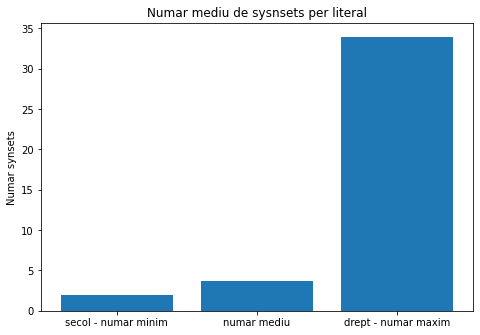

In [ ]:
#b
literal_min=[]
literal_max=[]
min_syn=999
max_syn=0
sum=0
for i in literal_synsets:
  sum=sum+literal_synsets[i]
  if(literal_synsets[i]<min_syn):
    min_syn=literal_synsets[i]
  if(literal_synsets[i]>max_syn):
    max_syn=literal_synsets[i]


for i in literal_synsets:
  if(literal_synsets[i]==min_syn):
    literal_min.append(i)
  if(literal_synsets[i]==max_syn):
    literal_max.append(i)
nr_mediu_synsets_per_literal=sum/len(literal_synsets)
print("Numarul mediu de synsets per literal")
print(nr_mediu_synsets_per_literal)


#afisare in matplotlib
# creating a new dictionary
toBeDisplayed = {literal_min[0]+" - numar minim":min_syn, "numar mediu":nr_mediu_synsets_per_literal, literal_max[0]+" - numar maxim":max_syn}

# list out keys and values separately
keyList = list(toBeDisplayed.keys())
valueList = list(toBeDisplayed.values())

fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])

ax.set_ylabel('Scores')
ax.set_ylabel('Numar synsets')
ax.set_title('Numar mediu de sysnsets per literal')

ax.bar(keyList, valueList)
plt.show()

#scriere in csv
lista=[{"numar mediu per literal":nr_mediu_synsets_per_literal,"literali cu numarul cel mai mic de synsets":literal_min,"numar minim de synsets":min_syn,"literal cu cel mai mare numar de synsets":literal_max,"numar maxim de synsets":max_syn}]
pctb=pd.DataFrame(lista)
pctb.to_csv('drive/MyDrive/tema2IA/pctB.csv', encoding="utf-8")



rezultat={}
#afisare cu plotly
i=0
while i<max_syn+1:
  rezultat["literals cu "+str(i)+" synsets"]=0
  for j in literal_sentences:
    if(i==literal_sentences[j]):
      rezultat["literals cu "+str(i)+" synsets"]=rezultat["literals cu "+str(i)+" synsets"]+1
  i=i+1
toDF=[]
dictionar={}
for r in rezultat:
  if(rezultat[r]!=0):
    toDF.append({"interval":r,"numar":rezultat[r]})
helperA_df=pd.DataFrame(toDF)
fig = px.pie(helperA_df, values='numar', names='interval', title='Numar de literals cu un numar x de synseturi')
fig.show()

#end B

#begin C

In [ ]:

def calc_probabilitati(vector):
  suma=0
  for i in range(len(vector)):
    suma=suma+vector[i]
  if suma==0:
    return -1
  for i in range(len(vector)):
    vector[i]=vector[i]/suma
  return vector

#tendinta centrala a valorilor->spre care element tind sa mearga toate intrarile
def calc_media(vector_probab):
  media=0
  for i in range(len(vector_probab)):
    media=media+vector_probab[i]*i
  return media


#se mai numeste dispersie 
#cat de dispersate sunt valorile in distributia data 
def calc_varianta(vector_probab,media):
  varianta=0
  for i in range(len(vector_probab)):
    varianta=varianta+vector_probab[i]*(i-media)*(i-media)
  return varianta

#skewness este o masura a simetriei distributiei fata de dreapta d=media
#skewness=0=> grafic simetric
#skewness<0=> distributie cu coada spre stanga
#skewness>0=> distributie cu coada spre dreapta
def calc_skewness(vector_probab,media,dev_standard):
  sk=0
  for i in range(len(vector_probab)):
    try:
      sk=sk+vector_probab[i]*(((i-media)**3)/(dev_standard**3))
    except:
      return 0
  return sk

#deviatia standard- masura a dispersiei in raport cu media 
#deviatia standard mica=> cele mai multe elemente tind spre valoarea medie
#deviatia standard mare=>cele mai multe nu tind spre medie 


def metrici(vector):
  vector_p=calc_probabilitati(vector)
  if vector_p==-1:
    return {"media":0,"varianta":0,"deviatia standard":0,"skewness":0}
  media=calc_media(vector_p)
  varianta=calc_varianta(vector_p,media)
  deviatia_standard=math.sqrt(varianta)
  skewness=calc_skewness(vector_p,media,deviatia_standard)
  rezultat={"media":media,"varianta":varianta,"deviatia standard":deviatia_standard,"skewness":skewness}
  return rezultat

dict_stats={}

vector_c=[]
for  literals in df:
  synset_dic={}
  synset_dic_keys=df[literals][0]['synsets'].split();
  for i in synset_dic_keys:
    if(i!='-1'):
      synset_dic[i]=0
  for input in df[literals]:
    if input['correct_synset_id'] in synset_dic:
      synset_dic[input['correct_synset_id']]=synset_dic[input['correct_synset_id']]+1
  synset_vector=[]
  for i in synset_dic:
    synset_vector.append(synset_dic[i])
  result=metrici(synset_vector)
  result["numar de propozitii"]=literal_sentences[literals]
  count_zeros=0
  for i in synset_vector:
    if i==0:
      count_zeros=count_zeros+1
  result["numarul de synset-uri cu zero propozitii"]=count_zeros
  c_dict={}
  c_dict["literal"]=literals
  c_dict["media"]=result["media"]
  c_dict["varianta"]=result["varianta"]
  c_dict["deviatia standard"]=result["deviatia standard"]
  c_dict["skewness"]=result["skewness"]
  c_dict["numarul de synset-uri cu zero propozitii"]=count_zeros
  c_dict["numar de propozitii"]=literal_sentences[literals]
  dict_stats[literals]=result
  vector_c.append(c_dict)

pctc=pd.DataFrame(vector_c)
pctc.to_csv('drive/MyDrive/tema2IA/pctC.csv', encoding="utf-8")


###afisare cu matplotlib a distributiei normale

In [ ]:
helper=list(pctc['literal'])
helper.sort()
lit = widgets.Dropdown(options=helper)
lit


Dropdown(options=('C', 'Constanța', 'Diana', 'Iași', 'Leon', 'Palestina', 'Paris', 'Z', 'abandon', 'abandonare…

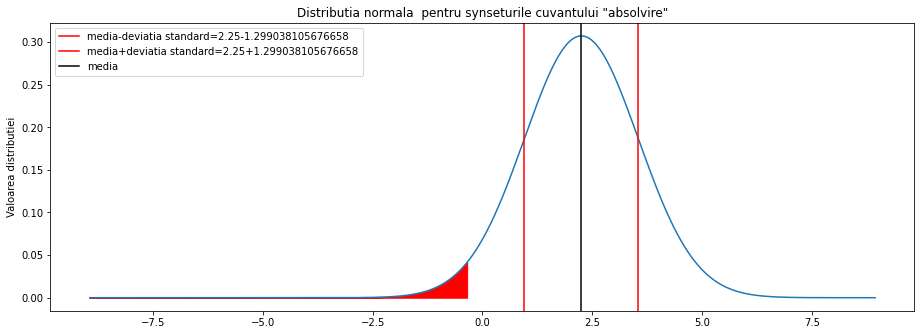

Asimetria/skewness=-1.1547005383792515


In [ ]:
fig = plt.figure()
x_axis = np.arange(-1*(dict_stats[lit.value]['varianta']+dict_stats[lit.value]['media'])-5, dict_stats[lit.value]['varianta']+dict_stats[lit.value]['media']+5, 0.001)
ax = fig.add_axes([1, 1, 2, 1])
ax.set_ylabel('Scores')
ax.set_ylabel('Valoarea distributiei')
ax.set_title('Distributia normala  pentru synseturile cuvantului "'+lit.value+'"')

plt.plot(x_axis, norm.pdf(x_axis, dict_stats[lit.value]['media'],dict_stats[lit.value]['deviatia standard']))
xposition = [dict_stats[lit.value]['media']-dict_stats[lit.value]['deviatia standard'],dict_stats[lit.value]['media'],dict_stats[lit.value]['media']+dict_stats[lit.value]['deviatia standard']]

plt.axvline(x=xposition[0], color='r', label='media-deviatia standard='+str(dict_stats[lit.value]['media'])+'-'+str(dict_stats[lit.value]['deviatia standard']))
plt.axvline(x=xposition[2], color='r', label='media+deviatia standard='+str(dict_stats[lit.value]['media'])+'+'+str(dict_stats[lit.value]['deviatia standard']))
plt.axvline(x=xposition[1], color='black', label='media')
plt.legend()
if(dict_stats[lit.value]['skewness']<0):
  axa=np.arange(-1*(dict_stats[lit.value]['varianta']+dict_stats[lit.value]['media'])-5,dict_stats[lit.value]['media']-2*dict_stats[lit.value]['deviatia standard'],0.001 )
  plt.fill_between(axa,norm.pdf(axa,dict_stats[lit.value]['media'],dict_stats[lit.value]['deviatia standard']) ,color='r')
if(dict_stats[lit.value]['skewness']>0):
  axa=np.arange(dict_stats[lit.value]['media']+2*dict_stats[lit.value]['deviatia standard'],dict_stats[lit.value]['varianta']+dict_stats[lit.value]['media']+5,0.001)
  plt.fill_between(axa,norm.pdf(axa,dict_stats[lit.value]['media'],dict_stats[lit.value]['deviatia standard']) ,color='r')
plt.show()

print("Asimetria/skewness="+str(dict_stats[lit.value]['skewness']))



### end afisare cu matplotlib a distributie de probabilitati

### afisare cu plotly 

In [ ]:
def dist_function(medie,deviatie,x):
  y=[]
  m_plus1=0
  m_plus2=0
  m_minus1=0
  m_minus2=0
  m_media=0
  for i in x:
    patrat=((i-medie)/deviatie)**2
    patrat=patrat*(-1/2)
    e=(math.e)**patrat
    f=(1/(deviatie*math.sqrt(2*math.pi)))*e
    if(i<medie+deviatie+0.01 and i>medie+deviatie-0.01):
      m_plus1=f
    if(i<medie-deviatie+0.01 and i>medie-deviatie-0.01):
      m_minus1=f
    if(i<medie+2*deviatie+0.01 and i>medie+2*deviatie-0.01):
      m_plus2=f
    if(i<medie-2*deviatie+0.01 and i>medie-2*deviatie-0.01):
      m_minus2=f
    if(i<medie+0.01 and i>medie-0.01):
      m_medie=f
    y.append(f) 
  return y,m_plus1,m_plus2,m_minus1,m_minus2,m_medie



synset_dic2={}
for  literals in df:
  synset_dic={}
  synset_dic_keys=df[literals][0]['synsets'].split();
  for i in synset_dic_keys:
    if(i!='-1'):
      synset_dic[i]=0
  for input in df[literals]:
    if input['correct_synset_id'] in synset_dic:
      synset_dic[input['correct_synset_id']]=synset_dic[input['correct_synset_id']]+1
  synset_vector=[]
  for i in synset_dic:
    synset_vector.append(synset_dic[i])
  synset_dic2[literals]=synset_vector

group_labels = ['Distributia normala']
colors = ['slategray','magenta','red','black','blue']
x2 = np.arange(-50,50,0.01)
yl,m_plus1,m_plus2,m_minus1,m_minus2,m_medie=dist_function(dict_stats[lit.value]['media'],dict_stats[lit.value]['deviatia standard'],x2)
fig = go.Figure()
fig.add_trace(go.Line(x=x2,
                y=yl,
                name='distributia_normala',
                marker_color='rgb(102,102,255)'
                ))
fig.add_trace(go.Scatter(x=[dict_stats[lit.value]['media']-2*dict_stats[lit.value]['deviatia standard']], 
                 y=[m_minus2],name='media-2*deviatia_standard',mode='markers',marker_color='rgb(102,102,102)'))
fig.add_trace(go.Scatter(x=[dict_stats[lit.value]['media']-dict_stats[lit.value]['deviatia standard']], 
                 y=[m_minus1],name='media-deviatia_standard',mode='markers',marker_color='magenta'))
fig.add_trace(go.Scatter(x=[dict_stats[lit.value]['media']+dict_stats[lit.value]['deviatia standard']], 
                 y=[m_plus1],name='media+deviatia_standard',mode='markers',marker_color='green'))
fig.add_trace(go.Scatter(x=[dict_stats[lit.value]['media']+2*dict_stats[lit.value]['deviatia standard']], 
                 y=[m_plus2],name='media+2*deviatia_standard',mode='markers',marker_color='black'))
fig.add_trace(go.Scatter(x=[dict_stats[lit.value]['media']], 
                 y=[m_medie],name='media',mode='markers',marker_color='red'))
#fig = px.line(x=x2, y=yl)

fig.update_layout(title='Distributia normala')
fig.show()
print("Asimetria/skewness="+str(dict_stats[lit.value]['skewness']))

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Asimetria/skewness=-1.1547005383792515


In [ ]:

# c display
to_be_displayed_c=dict_stats

keyList = list(to_be_displayed_c.keys())
valueList = list(to_be_displayed_c.values())

valoriMedie = []
for i in range(0, len(to_be_displayed_c)):
  valoriMedie.append(to_be_displayed_c[keyList[i]]['media'])

valoriVarianta = []
for i in range(0, len(to_be_displayed_c)):
  valoriVarianta.append(to_be_displayed_c[keyList[i]]['varianta'])

valoriDeviatia = []
for i in range(0, len(to_be_displayed_c)):
  valoriDeviatia.append(to_be_displayed_c[keyList[i]]['deviatia standard'])

valoriSkewness = []
for i in range(0, len(to_be_displayed_c)):
  valoriSkewness.append(to_be_displayed_c[keyList[i]]['skewness'])

valoriZero_synste = []
for i in range(0, len(to_be_displayed_c)):
  valoriZero_synste.append(to_be_displayed_c[keyList[i]]['numarul de synset-uri cu zero propozitii'])

valoriTotal_sentences = []
for i in range(0, len(to_be_displayed_c)):
  valoriTotal_sentences.append(to_be_displayed_c[keyList[i]]['numar de propozitii'])

fig = go.Figure()
fig.add_trace(go.Bar(x=keyList,
                y=valoriMedie,
                name='media',
                marker_color='rgb(102,255,255)'
                ))
fig.add_trace(go.Bar(x=keyList,
                y=valoriVarianta,
                name='varianta',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x=keyList,
                y=valoriDeviatia,
                name='deviatia standard',
                marker_color='rgb(102,178,255)'
                ))
fig.add_trace(go.Bar(x=keyList,
                y=valoriSkewness,
                name='skewness',
                marker_color='rgb(102,102,255)'
                ))
fig.add_trace(go.Bar(x=keyList,
                y=valoriZero_synste,
                name='numarul de synset-uri cu zero propozitii',
                marker_color='rgb(178, 102, 255)'
                ))
fig.add_trace(go.Bar(x=keyList,
                y=valoriTotal_sentences,
                name='numar de propozitii',
                marker_color='rgb(255, 102, 255)'
                ))

fig.update_layout(
    title='Metrici',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='y',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

### afisare cu matplotlib

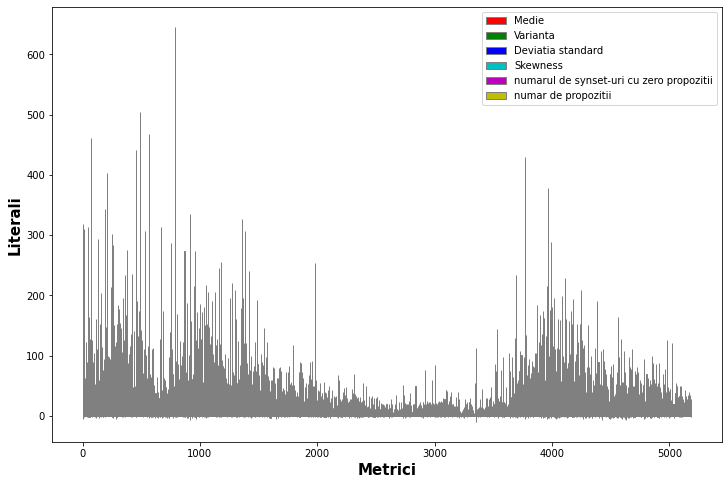

In [ ]:

 
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))

to_be_displayed_c=dict_stats


keyList = list(to_be_displayed_c.keys())
valueList = list(to_be_displayed_c.values())

valoriMedie = []
for i in range(0, len(to_be_displayed_c)):
  valoriMedie.append(to_be_displayed_c[keyList[i]]['media'])

valoriVarianta = []
for i in range(0, len(to_be_displayed_c)):
  valoriVarianta.append(to_be_displayed_c[keyList[i]]['varianta'])

valoriDeviatia = []
for i in range(0, len(to_be_displayed_c)):
  valoriDeviatia.append(to_be_displayed_c[keyList[i]]['deviatia standard'])

valoriSkewness = []
for i in range(0, len(to_be_displayed_c)):
  valoriSkewness.append(to_be_displayed_c[keyList[i]]['skewness'])

valoriZero_synste = []
for i in range(0, len(to_be_displayed_c)):
  valoriZero_synste.append(to_be_displayed_c[keyList[i]]['numarul de synset-uri cu zero propozitii'])

valoriTotal_sentences = []
for i in range(0, len(to_be_displayed_c)):
  valoriTotal_sentences.append(to_be_displayed_c[keyList[i]]['numar de propozitii'])
 
# Set position of bar on X axis
br1 = np.arange(len(valoriMedie))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
 
# Make the plot
plt.bar(br1, valoriMedie, color ='r', width = barWidth,
        edgecolor ='grey', label ='Medie')
plt.bar(br2, valoriVarianta, color ='g', width = barWidth,
        edgecolor ='grey', label ='Varianta')
plt.bar(br3, valoriDeviatia, color ='b', width = barWidth,
        edgecolor ='grey', label ='Deviatia standard')
plt.bar(br4, valoriSkewness, color ='c', width = barWidth,
        edgecolor ='grey', label ='Skewness')
plt.bar(br5, valoriZero_synste, color ='m', width = barWidth,
        edgecolor ='grey', label ='numarul de synset-uri cu zero propozitii')
plt.bar(br6, valoriTotal_sentences, color ='y', width = barWidth,
        edgecolor ='grey', label ='numar de propozitii')
 

plt.xlabel('Metrici', fontweight ='bold', fontsize = 15)
plt.ylabel('Literali', fontweight ='bold', fontsize = 15)

 
plt.legend()
plt.show()

# end C

#begin D

In [ ]:
#d solve 
wn = rwn.RoWordNet()
date_cerute=[]
all_literals=[]
synset_ids = wn.synsets()
for i in synset_ids:
  synset_object = wn(i)
  element_date_cerute={}
  dictionar={}
  numar_total_literals=0
  numar_literals_atinsi=0
  numar_propozitii_total=0
  for j in synset_object.literals:
    numar_total_literals=numar_total_literals+1
    if j  not in all_literals:
      all_literals.append(j)
    try:
      if(df[j]!=None):
        numar_literals_atinsi=numar_literals_atinsi+1
        dictionar[j]=literal_sentences[j]
        numar_propozitii_total=numar_propozitii_total+literal_sentences[j]
    except:
      a=[]
  element_date_cerute={"id":synset_object.id,"definitie":synset_object.definition,"numar literali":numar_total_literals,"numar literali atinsi":numar_literals_atinsi, "lista literali":dictionar,"total propozitii":numar_propozitii_total}
  date_cerute.append(element_date_cerute)  
print(len(all_literals))


50480


In [ ]:
pct_d = pd.DataFrame(date_cerute)
pct_d.to_csv("drive/MyDrive/tema2IA/pctD.csv", encoding="utf-8")

### afisare cu matplotlib

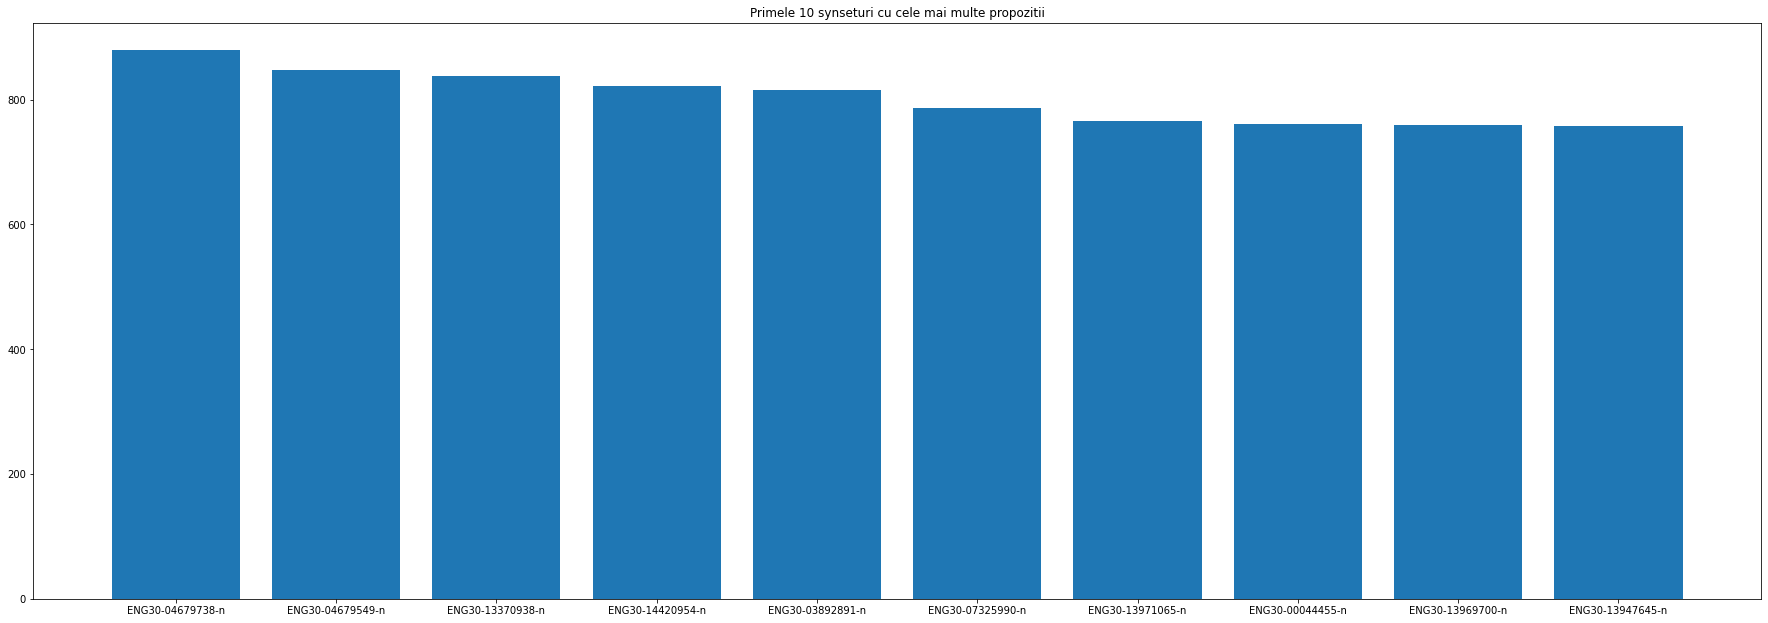

In [ ]:
out_dic={}
dic_def={}
for i in range(10):
  max=0
  synset=""
  for syns in date_cerute:
    if(syns['total propozitii']>max and (syns['id'] not in out_dic)):
      max=syns['total propozitii']
      synset=syns['id']
  out_dic[synset]=max
  dic_def[synset]=syns['definitie']

fig = plt.figure()
ax = fig.add_axes([0,0,4,2])
keys = list(out_dic.keys())
vals = list(out_dic.values())
ax.bar(keys,vals)
plt.title("Primele 10 synseturi cu cele mai multe propozitii")
plt.show()

In [ ]:
lit = widgets.Dropdown(options=list(out_dic.keys()))
lit

Dropdown(options=('ENG30-04679738-n', 'ENG30-04679549-n', 'ENG30-13370938-n', 'ENG30-14420954-n', 'ENG30-03892…

In [ ]:
print("definita pentru synsetul "+ lit.value+": "+dic_def[lit.value])

definita pentru synsetul ENG30-13370938-n: A spăla cu un pămătuf sau un mop


In [ ]:
from collections import namedtuple
import random 
Graph=namedtuple("Graph",["nodes","edges"])
nodes=[]
edges=[]

node_adjacencies = []
node_text = []

pozitii={}
for i in synset_ids:
  synset_object = wn(i)
  numar_total_literals=0
  for j in synset_object.literals:
    if j in df:
      numar_total_literals=numar_total_literals+1
  if numar_total_literals>5:
    nodes.append(i)
    node_text.append(synset_object.id)
    node_adjacencies.append(numar_total_literals)
    pozitii[i]=(random.random()-1,random.random())
    for j in synset_object.literals:
      if j in df:
        edges.append((i,j))
        edges.append((j,i))
for i in df:
  for edge in edges:
    if edge[1]==i:
      nodes.append(i)
      node_text.append(i)
      node_adjacencies.append(literal_synsets[i])
      pozitii[i]=(random.random()+1,random.random())
G=Graph(nodes,edges)


In [ ]:

import plotly.graph_objects as go

import networkx as nx
edge_x = []
edge_y = []
for edge in G.edges:
    x0, y0 = pozitii[edge[0]]
    x1, y1 = pozitii[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes:
    x, y = pozitii[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))



node_trace.marker.color = node_adjacencies
node_trace.text = node_text
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Demonstratie a legaturilor dintre literali si synseturi din setul de date',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
date_noi=[]

for i in range(len(date_cerute)):
  if(date_cerute[i]['numar literali atinsi']>5):
    for j in range(len(date_cerute[i]['lista literali'])):
      aux={}
      aux['numar literali atinsi']=date_cerute[i]['numar literali atinsi']
      aux['id']=date_cerute[i]['id']
      aux['literal']=list(date_cerute[i]['lista literali'].keys())[j]
      aux['numar propozitii']=list(date_cerute[i]['lista literali'].values())[j]
      date_noi.append(aux)
"""
for i in date_noi:
  lista=tuple(i['lista literali'].values())
  lista2=tuple(i['lista literali'])
  if(len(lista)>=1):
    i['lista literali']=lista2
    i['valori']=lista
  else:
    i['lista literali']=()
    i['valori']=()"""
pct_d = pd.DataFrame(date_noi)
pct_d

,numar literali atinsi,id,literal,numar propozitii
0,8,ENG30-00024264-n,însușire,55
1,8,ENG30-00024264-n,atribut,12
2,8,ENG30-00024264-n,calitate,63
3,8,ENG30-00024264-n,caracteristică,88
4,8,ENG30-00024264-n,notă,133
...,...,...,...,...
118,6,ENG30-04897762-n,comportare,19
119,6,ENG30-04897762-n,conduită,20
120,6,ENG30-04897762-n,purtare,28
121,6,ENG30-04897762-n,ținută,40


In [ ]:
fig = px.bar(pct_d, x="id", y="numar propozitii", color="literal",hover_data=['numar propozitii'], barmode = 'stack')
 
fig.show()

#end D

#begin E

In [ ]:

#e
sentences_per_user={}

for  literals in df:
  for input in df[literals]:
    if input['user_id'] not in sentences_per_user:
      sentences_per_user[input['user_id']]=0
    else:
      sentences_per_user[input['user_id']]=sentences_per_user[input['user_id']]+1

df_studenti=pd.read_excel(xls)
aux_dict={}

for users in sentences_per_user:
  try:
    id=int(users)
    if(id<96):
      aux_dict[df_studenti['Nume'][id-1]] = sentences_per_user[users]
  except:
    aux_dict[users] = sentences_per_user[users]

aux_keys=sorted(aux_dict)
aux_dict2={}
for i in aux_keys:
  aux_dict2[i]=aux_dict[i]
sentences_per_user=aux_dict2
for_DF=[]
for i in sentences_per_user:
  dictionarE={}
  dictionarE['Nume']=i
  dictionarE['Nr. propozitii']=sentences_per_user[i]
  for_DF.append(dictionarE)
pctE=pd.DataFrame(for_DF)
pctE.to_csv('drive/MyDrive/tema2IA/pctE.csv', encoding="utf-8")




### afisare cu Plotly

In [ ]:
toBeDisplayed = sentences_per_user

# list out keys and values separately
keyList = list(toBeDisplayed.keys())
valueList = list(toBeDisplayed.values())

fig = px.bar(x=keyList, y=valueList)
fig.show()

### afisare cu matplotlib

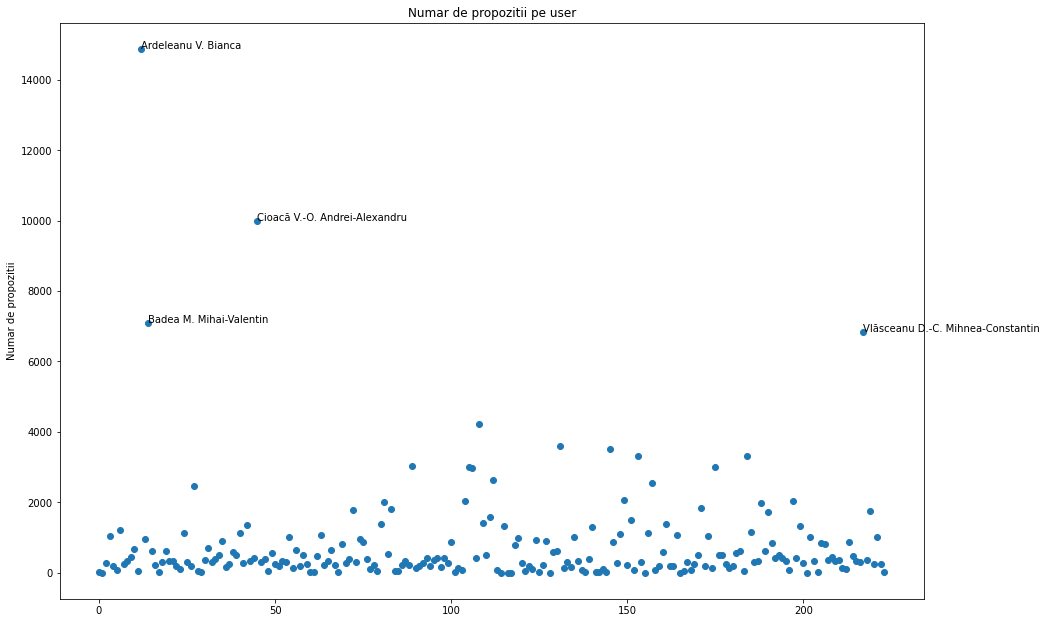

In [ ]:

toBeDisplayed = sentences_per_user

# list out keys and values separately
keyList = list(toBeDisplayed.keys())
valueList = list(toBeDisplayed.values())


fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

ax.set_ylabel('Numar de propozitii')
ax.set_title('Numar de propozitii pe user')

vector_speciali=[]
numere_speciali=[]
loc=[]
counter=0
for i in toBeDisplayed:
  if(toBeDisplayed[i]>5000):
    vector_speciali.append(i)
    loc.append(counter)
    numere_speciali.append(toBeDisplayed[i])
  counter=counter+1
ay=range(0,224)
plt.scatter(ay,valueList)
#plt.scatter(vector_speciali,numere_speciali)
for i, label in enumerate(vector_speciali):
    plt.annotate(label, (loc[i], numere_speciali[i]))
plt.show()

In [ ]:
lit = widgets.Dropdown(options=keyList)
lit

Dropdown(options=(' ', '0', 'Acatrinei Alin', 'Agopian I. Edward-Cristian-Raul', 'Alboteanu D. Mihai-Cătălin',…

In [ ]:
print(lit.value+" a facut "+ str(sentences_per_user[lit.value])+" propozitii")

Gociu G. Marian-Bogdan a facut 1387 propozitii


#end E

### Statistici generale

In [ ]:
total=0
for i in sentences_per_user:
  total=total+sentences_per_user[i]

print("Dintr-un numar de "+str(len(all_literals))+" au fost atinsi "+ str(len(literal_sentences))+", adica un procent de "+str(len(all_literals)/len(literal_sentences))+"%")
print("Numarul total de propozitii este "+str(total))

Dintr-un numar de 50480 au fost atinsi 5186, adica un procent de 9.733898958735056%
Numarul total de propozitii este 177406
